<a href="https://colab.research.google.com/github/Sshubam/PyTorch-Code/blob/main/PyTorch_3_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()

In [ ]:
type(data)

sklearn.utils.Bunch

In [ ]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
data.data.shape

(569, 30)

In [ ]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
data.target.shape

(569,)

In [ ]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape
N, D

(381, 30)

In [ ]:
X_train, X_test, y_train, y_test

(array([[1.425e+01, 2.215e+01, 9.642e+01, ..., 1.785e-01, 2.844e-01,
         1.132e-01],
        [1.359e+01, 1.784e+01, 8.624e+01, ..., 5.185e-02, 2.335e-01,
         6.263e-02],
        [1.566e+01, 2.320e+01, 1.102e+02, ..., 2.462e-01, 3.277e-01,
         1.019e-01],
        ...,
        [1.128e+01, 1.339e+01, 7.300e+01, ..., 8.611e-02, 2.102e-01,
         6.784e-02],
        [1.803e+01, 1.685e+01, 1.175e+02, ..., 1.535e-01, 2.842e-01,
         8.225e-02],
        [1.227e+01, 1.792e+01, 7.841e+01, ..., 9.532e-02, 3.455e-01,
         6.896e-02]]),
 array([[9.904e+00, 1.806e+01, 6.460e+01, ..., 9.910e-02, 2.614e-01,
         1.162e-01],
        [1.176e+01, 2.160e+01, 7.472e+01, ..., 3.715e-02, 2.433e-01,
         6.563e-02],
        [1.289e+01, 1.411e+01, 8.495e+01, ..., 1.561e-01, 2.639e-01,
         1.178e-01],
        ...,
        [9.029e+00, 1.733e+01, 5.879e+01, ..., 1.750e-01, 4.228e-01,
         1.175e-01],
        [9.042e+00, 1.890e+01, 6.007e+01, ..., 1.145e-01, 3.135e-01,
   

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train, X_test

(array([[ 0.05924492,  0.70827697,  0.21957031, ...,  1.00098843,
         -0.05690912,  1.61498547],
        [-0.14398997, -0.30964608, -0.23225877, ..., -0.92848768,
         -0.88285791, -1.13539413],
        [ 0.49342854,  0.95626286,  0.83118177, ...,  2.03237835,
          0.6457153 ,  1.00040589],
        ...,
        [-0.85531208, -1.3606339 , -0.81990288, ..., -0.40654649,
         -1.26094449, -0.85203487],
        [ 1.22322655, -0.54346135,  1.15518494, ...,  0.62012066,
         -0.06015449, -0.06830994],
        [-0.55045975, -0.29075191, -0.57978546, ..., -0.26623481,
          0.93455398, -0.79112079]]),
 array([[-1.27902603, -0.25768713, -1.19272844, ..., -0.2086476 ,
         -0.43012763,  1.77814819],
        [-0.70750489,  0.57837959, -0.7435624 , ..., -1.15243793,
         -0.72383437, -0.97223141],
        [-0.35954213, -1.19058643, -0.28951413, ...,  0.65973091,
         -0.3895604 ,  1.86516831],
        ...,
        [-1.54846622, -0.43009637, -1.45059946, ...,  

In [ ]:
model = nn.Sequential(
  nn.Linear(D, 1),
  nn.Sigmoid()
)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

In [ ]:
y_train

tensor([[0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
      

In [ ]:
y_test

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
      

In [ ]:
X_train.shape

torch.Size([381, 30])

In [ ]:
y_train.shape

torch.Size([381, 1])

In [ ]:
X_test.shape

torch.Size([188, 30])

In [ ]:
y_test.shape

torch.Size([188, 1])

In [ ]:
n_epochs = 1000
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)
train_accu =[]
test_accu = []
for it in range(n_epochs):
  optimizer.zero_grad()
  outputs=model(X_train)
  loss=criterion(outputs, y_train)
  loss.backward()
  optimizer.step()
  outputs_test=model(X_test)
  loss_test=criterion(outputs_test, y_test)
  train_losses[it]=loss.item()
  test_losses[it]=loss_test.item()

  with torch.no_grad():
    p_train = model(X_train)
    p_train = np.round(p_train.numpy())
    train_acc = np.mean(y_train.numpy() == p_train)

    p_test = model(X_test)
    p_test = np.round(p_test.numpy())
    test_acc = np.mean(y_test.numpy() == p_test)

  train_accu.append(train_acc)
  test_accu.append(test_acc)
  if (it+1)%50 == 0:
    print(f"Epoch {it+1}/{n_epochs}, Train_loss:{loss.item():.4f}, Test Loss: {loss_test.item():.4f}")
    print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Epoch 50/1000, Train_loss:0.5559, Test Loss: 0.5654
Train acc: 0.8110, Test acc: 0.7979
Epoch 100/1000, Train_loss:0.4029, Test Loss: 0.3976
Train acc: 0.9081, Test acc: 0.9149
Epoch 150/1000, Train_loss:0.3235, Test Loss: 0.3095
Train acc: 0.9239, Test acc: 0.9309
Epoch 200/1000, Train_loss:0.2743, Test Loss: 0.2549
Train acc: 0.9318, Test acc: 0.9362
Epoch 250/1000, Train_loss:0.2404, Test Loss: 0.2177
Train acc: 0.9370, Test acc: 0.9574
Epoch 300/1000, Train_loss:0.2155, Test Loss: 0.1906
Train acc: 0.9423, Test acc: 0.9734
Epoch 350/1000, Train_loss:0.1964, Test Loss: 0.1702
Train acc: 0.9475, Test acc: 0.9681
Epoch 400/1000, Train_loss:0.1814, Test Loss: 0.1544
Train acc: 0.9633, Test acc: 0.9681
Epoch 450/1000, Train_loss:0.1693, Test Loss: 0.1419
Train acc: 0.9633, Test acc: 0.9681
Epoch 500/1000, Train_loss:0.1593, Test Loss: 0.1317
Train acc: 0.9685, Test acc: 0.9681
Epoch 550/1000, Train_loss:0.1508, Test Loss: 0.1232
Train acc: 0.9685, Test acc: 0.9681
Epoch 600/1000, Train_

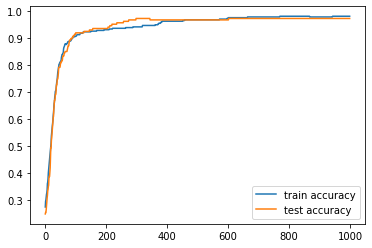

In [ ]:
plt.plot(train_accu, label="train accuracy")
plt.plot(test_accu, label = "test accuracy")
plt.legend()
plt.show()

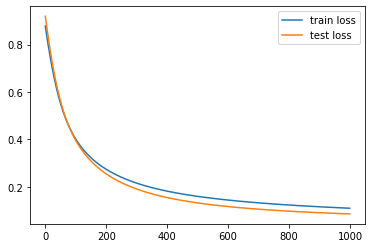

In [ ]:
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [ ]:
with torch.no_grad():
  p_train = model(X_train)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(y_train.numpy() == p_train)

  p_test = model(X_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(y_test.numpy() == p_test)
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9816, Test acc: 0.9734


# Save and Load Model

In [ ]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.2206, -0.2881, -0.3181, -0.1840, -0.2105, -0.1182, -0.4410, -0.4893,
                        0.0167,  0.4500, -0.3062, -0.0691, -0.3236, -0.3982, -0.0632,  0.1027,
                       -0.1243, -0.1609,  0.3801,  0.5332, -0.3569, -0.3671, -0.1740, -0.4287,
                       -0.4250, -0.2879, -0.2468, -0.2017, -0.3165, -0.2903]])),
             ('0.bias', tensor([0.6472]))])

In [ ]:
torch.save(model.state_dict(), "FirstPyTorchmodel.pt")

In [ ]:
!ls

FirstPyTorchmodel.pt  FirstPyTorchmode.pt  sample_data


In [ ]:
model2 = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)
model2.load_state_dict(torch.load("FirstPyTorchmodel.pt"))

<All keys matched successfully>

In [ ]:
with torch.no_grad():
  p_train = model2(X_train)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(y_train.numpy() == p_train)

  p_test = model2(X_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(y_test.numpy() == p_test)
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9816, Test acc: 0.9734


In [ ]:
from google.colab import files
files.download("FirstPyTorchmodel.pt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
 "cells": [
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "# PyTorch Tensors\n",
    "\n",
    "Tensors are the central data abstraction in PyTorch. This interactive notebook provides an in-depth introduction to the `torch.Tensor` class. You can run this notebook locally, on [Colab](https://colab.research.google.com/), or on your preferred cloud service.\n",
    "\n",
    "First things first, let's import the PyTorch module. We'll also add Python's math module to facilitate some of the examples."
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 1,
   "metadata": {},
   "outputs": [],
   "source": [
    "import torch\n",
    "import math"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "## Creating Tensors\n",
    "The simplest way to create a tensor is with the `torch.empty()` call:"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 2,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "<class 'torch.Tensor'>\n",
      "tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],\n",
      "        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],\n",
      "        [0.0000e+00, 0.0000e+00, 2.8026e-45, 0.0000e+00]])\n"
     ]
    }
   ],
   "source": [
    "x = torch.empty(3, 4)\n",
    "print(type(x))\n",
    "print(x)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "Let's unpack what we just did:\n",
    "\n",
    "* We created a tensor using one of the numerous factory methods attached to the `torch` module.\n",
    "* The tensor itself is 2-dimensional, having 3 rows and 4 columns.\n",
    "* The type of the object returned is `torch.Tensor`, which is an alias for `torch.FloatTensor`; by default, PyTorch tensors are populated with 32-bit floating point numbers. (More on data types below.)\n",
    "* You will probably see some random-looking values when printing your tensor. The `torch.empty()` call allocates memory for the tensor, but does not initialize it with any values - so what you're seeing is whatever was in memory at the time of allocation.\n",
    "\n",
    "A brief note about tensors and their number of dimensions, and terminology:\n",
    "* You will sometimes see a 1-dimensional tensor called a *vector.*\n",
    "* Likewise, a 2-dimensional tensor is often referred to as a *matrix.*\n",
    "* Anything with more than two dimensions is generally just called a tensor.\n",
    "\n",
    "More often than not, you'll want to initialize your tensor with some value. Common cases are all zeros, all ones, or random values, and the `torch` module provides factory methods for all of these:"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 3,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "tensor([[0., 0., 0.],\n",
      "        [0., 0., 0.]])\n",
      "tensor([[1., 1., 1.],\n",
      "        [1., 1., 1.]])\n",
      "tensor([[0.3126, 0.3791, 0.3087],\n",
      "        [0.0736, 0.4216, 0.0691]])\n"
     ]
    }
   ],
   "source": [
    "zeros = torch.zeros(2, 3)\n",
    "print(zeros)\n",
    "\n",
    "ones = torch.ones(2, 3)\n",
    "print(ones)\n",
    "\n",
    "torch.manual_seed(1729)\n",
    "random = torch.rand(2, 3)\n",
    "print(random)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "The factory methods all do just what you'd expect - we have a tensor full of zeros, another full of ones, and another with random values between 0 and 1.\n",
    "\n",
    "### Random Tensors and Seeding\n",
    "\n",
    "Speaking of the random tensor, did you notice the call to `torch.manual_seed()` immediately preceding it? Initializing tensors, such as a model's learning weights, with random values is common but there are times - especially in research settings - where you'll want some assurance of the reproducibility of your results. Manually setting your random number generator's seed is the way to do this. Let's look more closely:"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 4,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "tensor([[0.3126, 0.3791, 0.3087],\n",
      "        [0.0736, 0.4216, 0.0691]])\n",
      "tensor([[0.2332, 0.4047, 0.2162],\n",
      "        [0.9927, 0.4128, 0.5938]])\n",
      "tensor([[0.3126, 0.3791, 0.3087],\n",
      "        [0.0736, 0.4216, 0.0691]])\n",
      "tensor([[0.2332, 0.4047, 0.2162],\n",
      "        [0.9927, 0.4128, 0.5938]])\n"
     ]
    }
   ],
   "source": [
    "torch.manual_seed(1729)\n",
    "random1 = torch.rand(2, 3)\n",
    "print(random1)\n",
    "\n",
    "random2 = torch.rand(2, 3)\n",
    "print(random2)\n",
    "\n",
    "torch.manual_seed(1729)\n",
    "random3 = torch.rand(2, 3)\n",
    "print(random3)\n",
    "\n",
    "random4 = torch.rand(2, 3)\n",
    "print(random4)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "What you should see above is that `random1` and `random3` carry identical values, as do `random2` and `random4`. Manually setting the RNG's seed resets it, so that identical computations depending on random number should, in most settings, provide identical results.\n",
    "\n",
    "For more information, see the [PyTorch documentation on reproducibility](https://pytorch.org/docs/stable/notes/randomness.html).\n",
    "\n",
    "### Tensor Shapes\n",
    "Often, when you're performing operations on two or more tensors, they will need to be of the same *shape* - that is, having the same number of dimensions and the same number of cells in each dimension. For that, we have the `torch.*_like()` methods:"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 5,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "torch.Size([2, 2, 3])\n",
      "tensor([[[ 0.0000e+00,  1.0842e-19,  4.9628e-26],\n",
      "         [-2.5250e-29,  9.8091e-45,  0.0000e+00]],\n",
      "\n",
      "        [[ 0.0000e+00,  0.0000e+00,  0.0000e+00],\n",
      "         [ 0.0000e+00,  0.0000e+00,  0.0000e+00]]])\n",
      "torch.Size([2, 2, 3])\n",
      "tensor([[[ 2.5776e-33,  1.4013e-45,         nan],\n",
      "         [ 0.0000e+00,  1.4013e-45,  0.0000e+00]],\n",
      "\n",
      "        [[ 4.9477e-26, -3.6902e+19,  2.6082e-33],\n",
      "         [ 1.4013e-45,  4.9633e-26, -8.5920e+09]]])\n",
      "torch.Size([2, 2, 3])\n",
      "tensor([[[0., 0., 0.],\n",
      "         [0., 0., 0.]],\n",
      "\n",
      "        [[0., 0., 0.],\n",
      "         [0., 0., 0.]]])\n",
      "torch.Size([2, 2, 3])\n",
      "tensor([[[1., 1., 1.],\n",
      "         [1., 1., 1.]],\n",
      "\n",
      "        [[1., 1., 1.],\n",
      "         [1., 1., 1.]]])\n",
      "torch.Size([2, 2, 3])\n",
      "tensor([[[0.6128, 0.1519, 0.0453],\n",
      "         [0.5035, 0.9978, 0.3884]],\n",
      "\n",
      "        [[0.6929, 0.1703, 0.1384],\n",
      "         [0.4759, 0.7481, 0.0361]]])\n"
     ]
    }
   ],
   "source": [
    "x = torch.empty(2, 2, 3)\n",
    "print(x.shape)\n",
    "print(x)\n",
    "\n",
    "empty_like_x = torch.empty_like(x)\n",
    "print(empty_like_x.shape)\n",
    "print(empty_like_x)\n",
    "\n",
    "zeros_like_x = torch.zeros_like(x)\n",
    "print(zeros_like_x.shape)\n",
    "print(zeros_like_x)\n",
    "\n",
    "ones_like_x = torch.ones_like(x)\n",
    "print(ones_like_x.shape)\n",
    "print(ones_like_x)\n",
    "\n",
    "rand_like_x = torch.rand_like(x)\n",
    "print(rand_like_x.shape)\n",
    "print(rand_like_x)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "The first new thing in the code cell above is the use of the `.shape` property on a tensor. This property contains a list of the extent of each dimension of a tensor - in our case, `x` is a three-dimensional tensor with shape 2 x 2 x 3.\n",
    "\n",
    "Below that, we call the `.empty_like()`, `.zeros_like()`, `.ones_like()`, and `.rand_like()` methods. Using the `.shape` property, we can verify that each of these methods returns a tensor of identical dimensionality and extent.\n",
    "\n",
    "The last way to create a tensor that will cover is to specify its data directly from a PyTorch collection:"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 6,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "tensor([[3.1416, 2.7183],\n",
      "        [1.6180, 0.0073]])\n",
      "tensor([ 2,  3,  5,  7, 11, 13, 17, 19])\n",
      "tensor([[2, 4, 6],\n",
      "        [3, 6, 9]])\n"
     ]
    }
   ],
   "source": [
    "some_constants = torch.tensor([[3.1415926, 2.71828], [1.61803, 0.0072897]])\n",
    "print(some_constants)\n",
    "\n",
    "some_integers = torch.tensor((2, 3, 5, 7, 11, 13, 17, 19))\n",
    "print(some_integers)\n",
    "\n",
    "more_integers = torch.tensor(((2, 4, 6), [3, 6, 9]))\n",
    "print(more_integers)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "Using `torch.tensor()` is the most straightforward way to create a tensor if you already have data in a Python tuple or list. As shown above, nesting the collections will result in a multi-dimensional tensor.\n",
    "\n",
    "*Note: `torch.tensor()` creates a copy of the data.*\n",
    "\n",
    "### Tensor Data Types\n",
    "Setting the datatype of a tensor is possible a couple of ways:"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 7,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "tensor([[1, 1, 1],\n",
      "        [1, 1, 1]], dtype=torch.int16)\n",
      "tensor([[ 0.9956,  1.4148,  5.8364],\n",
      "        [11.2406, 11.2083, 11.6692]], dtype=torch.float64)\n",
      "tensor([[ 0,  1,  5],\n",
      "        [11, 11, 11]], dtype=torch.int32)\n"
     ]
    }
   ],
   "source": [
    "a = torch.ones((2, 3), dtype=torch.int16)\n",
    "print(a)\n",
    "\n",
    "b = torch.rand((2, 3), dtype=torch.float64) * 20.\n",
    "print(b)\n",
    "\n",
    "c = b.to(torch.int32)\n",
    "print(c)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "The simplest way to set the underlying data type of a tensor is with an optional argument at creation time. In the first line of the cell above, we set `dtype=torch.int16` for the tensor `a`. When we print `a`, we can see that it's full of `1` rather than `1.` - Python's subtle cue that this is an integer type rather than floating point.\n",
    "\n",
    "Another thing to notice about printing `a` is that, unlike when we left `dtype` as the default (32-bit floating point), printing the tensor also specifies its `dtype`.\n",
    "\n",
    "You may have also spotted that we went from specifying the tensor's shape as a series of integer arguments, to grouping those arguments in a tuple. This is not strictly necessary - PyTorch will take a series of initial, unlabeled integer arguments as a tensor shape - but when adding the optional arguments, it can make your intent more readable.\n",
    "\n",
    "The other way to set the datatype is with the `.to()` method. In the cell above, we create a random floating point tensor `b` in the usual way. Following that, we create `c` by converting `b` to a 32-bit integer with the `.to()` method. Note that `c` contains all the same values as `b`, but truncated to integers.\n",
    "\n",
    "Available data types include:\n",
    "\n",
    "* `torch.bool`\n",
    "* `torch.int8`\n",
    "* `torch.uint8`\n",
    "* `torch.int16`\n",
    "* `torch.int32`\n",
    "* `torch.int64`\n",
    "* `torch.half`\n",
    "* `torch.float`\n",
    "* `torch.double`\n",
    "* `torch.bfloat`\n",
    "\n",
    "## Math & Logic with PyTorch Tensors\n",
    "\n",
    "Now that you know some of the ways to create a tensor... what can you do with them?\n",
    "\n",
    "Let's look at basic arithmetic first, and how tensors interact with simple scalars:"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 8,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "tensor([[1., 1.],\n",
      "        [1., 1.]])\n",
      "tensor([[2., 2.],\n",
      "        [2., 2.]])\n",
      "tensor([[3., 3.],\n",
      "        [3., 3.]])\n",
      "tensor([[4., 4.],\n",
      "        [4., 4.]])\n",
      "tensor([[1.4142, 1.4142],\n",
      "        [1.4142, 1.4142]])\n"
     ]
    }
   ],
   "source": [
    "ones = torch.zeros(2, 2) + 1\n",
    "twos = torch.ones(2, 2) * 2\n",
    "threes = (torch.ones(2, 2) * 7 - 1) / 2\n",
    "fours = twos ** 2\n",
    "sqrt2s = twos ** 0.5\n",
    "\n",
    "print(ones)\n",
    "print(twos)\n",
    "print(threes)\n",
    "print(fours)\n",
    "print(sqrt2s)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "As you can see above, arithmetic operations between tensors and scalars, such as addition, subtraction, multiplication, division, and exponentiation are distributed over every element of the tensor. Because the output of such an operation will be a tensor, you can chain them together with the usual operator precedence rules, as in the line where we create `threes`.\n",
    "\n",
    "Similar operations between two tensors also behave like you'd intuitively expect:"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 9,
   "metadata": {
    "scrolled": true
   },
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "tensor([[ 2.,  4.],\n",
      "        [ 8., 16.]])\n",
      "tensor([[5., 5.],\n",
      "        [5., 5.]])\n",
      "tensor([[12., 12.],\n",
      "        [12., 12.]])\n"
     ]
    }
   ],
   "source": [
    "powers2 = twos ** torch.tensor([[1, 2], [3, 4]])\n",
    "print(powers2)\n",
    "\n",
    "fives = ones + fours\n",
    "print(fives)\n",
    "\n",
    "dozens = threes * fours\n",
    "print(dozens)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "It's important to note here that all of the tensors in the previous code cell were of identical shape. What happens when we try to perform a binary operation on tensors if dissimilar shape?\n",
    "\n",
    "**Note: The following cell throws a run-time error. This is intentional.**"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 10,
   "metadata": {},
   "outputs": [
    {
     "ename": "RuntimeError",
     "evalue": "The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 1",
     "output_type": "error",
     "traceback": [
      "\u001b[0;31m---------------------------------------------------------------------------\u001b[0m",
      "\u001b[0;31mRuntimeError\u001b[0m                              Traceback (most recent call last)",
      "\u001b[0;32m<ipython-input-10-fcc83145fe91>\u001b[0m in \u001b[0;36m<module>\u001b[0;34m\u001b[0m\n\u001b[1;32m      2\u001b[0m \u001b[0mb\u001b[0m \u001b[0;34m=\u001b[0m \u001b[0mtorch\u001b[0m\u001b[0;34m.\u001b[0m\u001b[0mrand\u001b[0m\u001b[0;34m(\u001b[0m\u001b[0;36m3\u001b[0m\u001b[0;34m,\u001b[0m \u001b[0;36m2\u001b[0m\u001b[0;34m)\u001b[0m\u001b[0;34m\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n\u001b[1;32m      3\u001b[0m \u001b[0;34m\u001b[0m\u001b[0m\n\u001b[0;32m----> 4\u001b[0;31m \u001b[0mprint\u001b[0m\u001b[0;34m(\u001b[0m\u001b[0ma\u001b[0m \u001b[0;34m*\u001b[0m \u001b[0mb\u001b[0m\u001b[0;34m)\u001b[0m\u001b[0;34m\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n\u001b[0m",
      "\u001b[0;31mRuntimeError\u001b[0m: The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 1"
     ]
    }
   ],
   "source": [
    "a = torch.rand(2, 3)\n",
    "b = torch.rand(3, 2)\n",
    "\n",
    "print(a * b)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "In the general case, you cannot operate on tensors of different shape this way, even in a case like the cell above, where the tensors have an identical number of elements.\n",
    "\n",
    "### In Brief: Tensor Broadcasting\n",
    "\n",
    "*(Note: If you are familiar with broadcasting semantics in NumPy ndarrays, you'll find the same rules apply here.)*\n",
    "\n",
    "The exception to the same-shapes rule is *tensor broadcasting.* Here's an example:"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 11,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "tensor([[0.2024, 0.5731, 0.7191, 0.4067],\n",
      "        [0.7301, 0.6276, 0.7357, 0.0381]])\n",
      "tensor([[0.4049, 1.1461, 1.4382, 0.8134],\n",
      "        [1.4602, 1.2551, 1.4715, 0.0762]])\n"
     ]
    }
   ],
   "source": [
    "rand = torch.rand(2, 4)\n",
    "doubled = rand * (torch.ones(1, 4) * 2)\n",
    "\n",
    "print(rand)\n",
    "print(doubled)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "What's the trick here? How is it we got to multiply a 2x4 tensor by a 1x4 tensor?\n",
    "\n",
    "Broadcasting is a way to perform an operation between tensors that have similarities in their shapes. In the example above, the one-row, four-column tensor is multiplied by *both rows* of the two-row, four-column tensor.\n",
    "\n",
    "This is an important operation in Deep Learning. The common example is multiplying a tensor of learning weights by a *batch* of input tensors, applying the operation to each instance in the batch separately, and returning a tensor of identical shape - just like our (2, 4) * (1, 4) example above returned a tensor of shape (2, 4).\n",
    "\n",
    "The rules for broadcasting are:\n",
    "\n",
    "* Each tensor must have at least one dimension - no empty tensors.\n",
    "* Comparing the dimension sizes of the two tensors, *going from last to first:*\n",
    "* * Each dimension must be equal, *or*\n",
    "* * One of the dimensions must be of size 1, *or*\n",
    "* * The dimension does not exist in one of the tensors\n",
    "\n",
    "Tensors of identical shape, of course, are trivially \"broadcastable\", as you saw earlier.\n",
    "\n",
    "Here are some examples of situations that honor the above rules and allow broadcasting:"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 12,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "tensor([[[0.2138, 0.5395],\n",
      "         [0.3686, 0.4007],\n",
      "         [0.7220, 0.8217]],\n",
      "\n",
      "        [[0.2138, 0.5395],\n",
      "         [0.3686, 0.4007],\n",
      "         [0.7220, 0.8217]],\n",
      "\n",
      "        [[0.2138, 0.5395],\n",
      "         [0.3686, 0.4007],\n",
      "         [0.7220, 0.8217]],\n",
      "\n",
      "        [[0.2138, 0.5395],\n",
      "         [0.3686, 0.4007],\n",
      "         [0.7220, 0.8217]]])\n",
      "tensor([[[0.2612, 0.2612],\n",
      "         [0.7375, 0.7375],\n",
      "         [0.8328, 0.8328]],\n",
      "\n",
      "        [[0.2612, 0.2612],\n",
      "         [0.7375, 0.7375],\n",
      "         [0.8328, 0.8328]],\n",
      "\n",
      "        [[0.2612, 0.2612],\n",
      "         [0.7375, 0.7375],\n",
      "         [0.8328, 0.8328]],\n",
      "\n",
      "        [[0.2612, 0.2612],\n",
      "         [0.7375, 0.7375],\n",
      "         [0.8328, 0.8328]]])\n",
      "tensor([[[0.8444, 0.2941],\n",
      "         [0.8444, 0.2941],\n",
      "         [0.8444, 0.2941]],\n",
      "\n",
      "        [[0.8444, 0.2941],\n",
      "         [0.8444, 0.2941],\n",
      "         [0.8444, 0.2941]],\n",
      "\n",
      "        [[0.8444, 0.2941],\n",
      "         [0.8444, 0.2941],\n",
      "         [0.8444, 0.2941]],\n",
      "\n",
      "        [[0.8444, 0.2941],\n",
      "         [0.8444, 0.2941],\n",
      "         [0.8444, 0.2941]]])\n"
     ]
    }
   ],
   "source": [
    "a =     torch.ones(4, 3, 2)\n",
    "\n",
    "b = a * torch.rand(   3, 2) # 3rd & 2nd dims identical to a, dim 1 absent\n",
    "print(b)\n",
    "\n",
    "c = a * torch.rand(   3, 1) # 3rd dim = 1, 2nd dim identical to a\n",
    "print(c)\n",
    "\n",
    "d = a * torch.rand(   1, 2) # 3rd dim identical to a, 2nd dim = 1\n",
    "print(d)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "Look closely at the values of each tensor above:\n",
    "* The multiplication operation that created `b` was broadcast over every \"layer\" of `a`.\n",
    "* For `c`, the operation was broadcast over ever layer and row of `a` - every 3-element column is identical.\n",
    "* For `d`, we switched it around - now every *row* is identical, across layers and columns.\n",
    "\n",
    "For more information on broadcasting, see the [PyTorch documentation](https://pytorch.org/docs/stable/notes/broadcasting.html) on the topic.\n",
    "\n",
    "Here are some examples of attempts at broadcasting that will fail:\n",
    "\n",
    "**Note: The following cell throws a run-time error. This is intentional.**"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 13,
   "metadata": {},
   "outputs": [
    {
     "ename": "RuntimeError",
     "evalue": "The size of tensor a (2) must match the size of tensor b (3) at non-singleton dimension 2",
     "output_type": "error",
     "traceback": [
      "\u001b[0;31m---------------------------------------------------------------------------\u001b[0m",
      "\u001b[0;31mRuntimeError\u001b[0m                              Traceback (most recent call last)",
      "\u001b[0;32m<ipython-input-13-591adab00a90>\u001b[0m in \u001b[0;36m<module>\u001b[0;34m\u001b[0m\n\u001b[1;32m      1\u001b[0m \u001b[0ma\u001b[0m \u001b[0;34m=\u001b[0m     \u001b[0mtorch\u001b[0m\u001b[0;34m.\u001b[0m\u001b[0mones\u001b[0m\u001b[0;34m(\u001b[0m\u001b[0;36m4\u001b[0m\u001b[0;34m,\u001b[0m \u001b[0;36m3\u001b[0m\u001b[0;34m,\u001b[0m \u001b[0;36m2\u001b[0m\u001b[0;34m)\u001b[0m\u001b[0;34m\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n\u001b[1;32m      2\u001b[0m \u001b[0;34m\u001b[0m\u001b[0m\n\u001b[0;32m----> 3\u001b[0;31m \u001b[0mb\u001b[0m \u001b[0;34m=\u001b[0m \u001b[0ma\u001b[0m \u001b[0;34m*\u001b[0m \u001b[0mtorch\u001b[0m\u001b[0;34m.\u001b[0m\u001b[0mrand\u001b[0m\u001b[0;34m(\u001b[0m\u001b[0;36m4\u001b[0m\u001b[0;34m,\u001b[0m \u001b[0;36m3\u001b[0m\u001b[0;34m)\u001b[0m    \u001b[0;31m# dimensions must match last-to-first\u001b[0m\u001b[0;34m\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n\u001b[0m\u001b[1;32m      4\u001b[0m \u001b[0;34m\u001b[0m\u001b[0m\n\u001b[1;32m      5\u001b[0m \u001b[0mc\u001b[0m \u001b[0;34m=\u001b[0m \u001b[0ma\u001b[0m \u001b[0;34m*\u001b[0m \u001b[0mtorch\u001b[0m\u001b[0;34m.\u001b[0m\u001b[0mrand\u001b[0m\u001b[0;34m(\u001b[0m   \u001b[0;36m2\u001b[0m\u001b[0;34m,\u001b[0m \u001b[0;36m3\u001b[0m\u001b[0;34m)\u001b[0m \u001b[0;31m# both 3rd & 2nd dims different\u001b[0m\u001b[0;34m\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n",
      "\u001b[0;31mRuntimeError\u001b[0m: The size of tensor a (2) must match the size of tensor b (3) at non-singleton dimension 2"
     ]
    }
   ],
   "source": [
    "a =     torch.ones(4, 3, 2)\n",
    "\n",
    "b = a * torch.rand(4, 3)    # dimensions must match last-to-first\n",
    "\n",
    "c = a * torch.rand(   2, 3) # both 3rd & 2nd dims different\n",
    "\n",
    "d = a * torch.rand((0, ))   # can't broadcast with an empty tensor"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### More Math with Tensors\n",
    "\n",
    "PyTorch tensors have over three hundred operations that can be performed on them.\n",
    "\n",
    "Here is a small sample from some of the major categories of operations:"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 14,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Common functions:\n",
      "tensor([[0.8447, 0.1992, 0.9755, 0.9295],\n",
      "        [0.8190, 0.1029, 0.7480, 0.4949]])\n",
      "tensor([[-0., -0., 1., -0.],\n",
      "        [-0., -0., 1., -0.]])\n",
      "tensor([[-1., -1.,  0., -1.],\n",
      "        [-1., -1.,  0., -1.]])\n",
      "tensor([[-0.5000, -0.1992,  0.5000, -0.5000],\n",
      "        [-0.5000, -0.1029,  0.5000, -0.4949]])\n",
      "\n",
      "Sine and arcsine:\n",
      "tensor([0.0000, 0.7854, 1.5708, 2.3562])\n",
      "tensor([0.0000, 0.7071, 1.0000, 0.7071])\n",
      "tensor([0.0000, 0.7854, 1.5708, 0.7854])\n",
      "\n",
      "Bitwise XOR:\n",
      "tensor([3, 2, 1])\n",
      "\n",
      "Broadcasted, element-wise equality comparison:\n",
      "tensor([[ True, False],\n",
      "        [False, False]])\n",
      "\n",
      "Reduction ops:\n",
      "tensor(4.)\n",
      "4.0\n",
      "tensor(2.5000)\n",
      "tensor(1.2910)\n",
      "tensor(24.)\n",
      "tensor([1, 2])\n",
      "\n",
      "Vectors & Matrices:\n",
      "tensor([ 0.,  0., -1.])\n",
      "tensor([[0.6923, 0.7545],\n",
      "        [0.7746, 0.2330]])\n",
      "tensor([[2.0769, 2.2636],\n",
      "        [2.3237, 0.6990]])\n",
      "torch.return_types.svd(\n",
      "U=tensor([[-0.7959, -0.6054],\n",
      "        [-0.6054,  0.7959]]),\n",
      "S=tensor([3.7831, 1.0066]),\n",
      "V=tensor([[-0.8088,  0.5881],\n",
      "        [-0.5881, -0.8088]]))\n"
     ]
    }
   ],
   "source": [
    "# common functions\n",
    "a = torch.rand(2, 4) * 2 - 1\n",
    "print('Common functions:')\n",
    "print(torch.abs(a))\n",
    "print(torch.ceil(a))\n",
    "print(torch.floor(a))\n",
    "print(torch.clamp(a, -0.5, 0.5))\n",
    "\n",
    "# trigonometric functions and their inverses\n",
    "angles = torch.tensor([0, math.pi / 4, math.pi / 2, 3 * math.pi / 4])\n",
    "sines = torch.sin(angles)\n",
    "inverses = torch.asin(sines)\n",
    "print('\\nSine and arcsine:')\n",
    "print(angles)\n",
    "print(sines)\n",
    "print(inverses)\n",
    "\n",
    "# bitwise operations\n",
    "print('\\nBitwise XOR:')\n",
    "b = torch.tensor([1, 5, 11])\n",
    "c = torch.tensor([2, 7, 10])\n",
    "print(torch.bitwise_xor(b, c))\n",
    "\n",
    "# comparisons:\n",
    "print('\\nBroadcasted, element-wise equality comparison:')\n",
    "d = torch.tensor([[1., 2.], [3., 4.]])\n",
    "e = torch.ones(1, 2)  # many comparison ops support broadcasting!\n",
    "print(torch.eq(d, e)) # returns a tensor of type bool\n",
    "\n",
    "# reductions:\n",
    "print('\\nReduction ops:')\n",
    "print(torch.max(d))        # returns a single-element tensor\n",
    "print(torch.max(d).item()) # extracts the value from the returned tensor\n",
    "print(torch.mean(d))       # average\n",
    "print(torch.std(d))        # standard deviation\n",
    "print(torch.prod(d))       # product of all numbers\n",
    "print(torch.unique(torch.tensor([1, 2, 1, 2, 1, 2]))) # filter unique elements\n",
    "\n",
    "# vector and linear algebra operations\n",
    "v1 = torch.tensor([1., 0., 0.])         # x unit vector\n",
    "v2 = torch.tensor([0., 1., 0.])         # y unit vector\n",
    "m1 = torch.rand(2, 2)                   # random matrix\n",
    "m2 = torch.tensor([[3., 0.], [0., 3.]]) # three times identity matrix\n",
    "\n",
    "print('\\nVectors & Matrices:')\n",
    "print(torch.cross(v2, v1)) # negative of z unit vector (v1 x v2 == -v2 x v1)\n",
    "print(m1)\n",
    "m3 = torch.matmul(m1, m2)\n",
    "print(m3)                  # 3 times m1\n",
    "print(torch.svd(m3))       # singular value decomposition"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "This is a small sample of For more details and the full inventory of math functions, have a look at the [documentation](https://pytorch.org/docs/stable/torch.html#math-operations).\n",
    "\n",
    "### Altering Tensors in Place\n",
    "\n",
    "Most binary operations on tensors will return a third, new tensor. When we say `c = a * b` (where `a` and `b` are tensors), the new tensor `c` will occupy a region of memory distinct from the other tensors.\n",
    "\n",
    "There are times, though, that you may wish to alter a tensor in place - for example, if you're doing an element-wise computation where you can discard intermediate values. For this, most of the math functions have a version with an appended underscore (`_`) that will alter a tensor in place.\n",
    "\n",
    "For example:"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 15,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "a:\n",
      "tensor([0.0000, 0.7854, 1.5708, 2.3562])\n",
      "tensor([0.0000, 0.7071, 1.0000, 0.7071])\n",
      "tensor([0.0000, 0.7854, 1.5708, 2.3562])\n",
      "\n",
      "b:\n",
      "tensor([0.0000, 0.7854, 1.5708, 2.3562])\n",
      "tensor([0.0000, 0.7071, 1.0000, 0.7071])\n",
      "tensor([0.0000, 0.7071, 1.0000, 0.7071])\n"
     ]
    }
   ],
   "source": [
    "a = torch.tensor([0, math.pi / 4, math.pi / 2, 3 * math.pi / 4])\n",
    "print('a:')\n",
    "print(a)\n",
    "print(torch.sin(a))   # this operation creates a new tensor in memory\n",
    "print(a)              # a has not changed\n",
    "\n",
    "b = torch.tensor([0, math.pi / 4, math.pi / 2, 3 * math.pi / 4])\n",
    "print('\\nb:')\n",
    "print(b)\n",
    "print(torch.sin_(b))  # note the underscore\n",
    "print(b)              # b has changed"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "For arithmetic operations, there are functions that behave similarly:"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 16,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Before:\n",
      "tensor([[1., 1.],\n",
      "        [1., 1.]])\n",
      "tensor([[0.8441, 0.9004],\n",
      "        [0.3995, 0.6324]])\n",
      "\n",
      "After adding:\n",
      "tensor([[1.8441, 1.9004],\n",
      "        [1.3995, 1.6324]])\n",
      "tensor([[1.8441, 1.9004],\n",
      "        [1.3995, 1.6324]])\n",
      "tensor([[0.8441, 0.9004],\n",
      "        [0.3995, 0.6324]])\n",
      "\n",
      "After multiplying\n",
      "tensor([[0.7125, 0.8107],\n",
      "        [0.1596, 0.3999]])\n",
      "tensor([[0.7125, 0.8107],\n",
      "        [0.1596, 0.3999]])\n"
     ]
    }
   ],
   "source": [
    "a = torch.ones(2, 2)\n",
    "b = torch.rand(2, 2)\n",
    "\n",
    "print('Before:')\n",
    "print(a)\n",
    "print(b)\n",
    "print('\\nAfter adding:')\n",
    "print(a.add_(b))\n",
    "print(a)\n",
    "print(b)\n",
    "print('\\nAfter multiplying')\n",
    "print(b.mul_(b))\n",
    "print(b)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "Note that these in-place arithmetic functions are methods on the `torch.Tensor` object, not attached to the `torch` module like many other functions (e.g., `torch.sin()`). As you can see from `a.add_(b)`, *the calling tensor is the one that gets changed in place.*\n",
    "\n",
    "There is another option for placing the result of a computation in an existing, allocated tensor. Many of the methods and functions we've seen so far - including creation methods! - have an `out` argument that lets you specify a tensor to receive the output. If the `out` tensor is the correct shape and `dtype`, this can happen without a new memory allocation:"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 17,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "tensor([[0., 0.],\n",
      "        [0., 0.]])\n",
      "tensor([[0.6202, 0.3974],\n",
      "        [0.4075, 0.6706]])\n",
      "tensor([[0.4491, 0.6265],\n",
      "        [0.9411, 0.4922]])\n"
     ]
    }
   ],
   "source": [
    "a = torch.rand(2, 2)\n",
    "b = torch.rand(2, 2)\n",
    "c = torch.zeros(2, 2)\n",
    "old_id = id(c)\n",
    "\n",
    "print(c)\n",
    "d = torch.matmul(a, b, out=c)\n",
    "print(c)                # contents of c have changed\n",
    "\n",
    "assert c is d           # test c & d are same object, not just containing equal values\n",
    "assert id(c), old_id    # make sure that our new c is the same object as the old one\n",
    "\n",
    "torch.rand(2, 2, out=c) # works for creation too!\n",
    "print(c)                # c has changed again\n",
    "assert id(c), old_id    # still the same object!"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "## Copying Tensors\n",
    "\n",
    "As with any object in Python, assigning a tensor to a variable makes the variable a *label* of the tensor, and does not copy it. For example:"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 18,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "tensor([[  1., 561.],\n",
      "        [  1.,   1.]])\n"
     ]
    }
   ],
   "source": [
    "a = torch.ones(2, 2)\n",
    "b = a\n",
    "\n",
    "a[0][1] = 561  # we change a...\n",
    "print(b)       # ...and b is also altered"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "But what if you want a separate copy of the data to work on? The `clone()` method is there for you:"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 19,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "tensor([[True, True],\n",
      "        [True, True]])\n",
      "tensor([[1., 1.],\n",
      "        [1., 1.]])\n"
     ]
    }
   ],
   "source": [
    "a = torch.ones(2, 2)\n",
    "b = a.clone()\n",
    "\n",
    "assert b is not a      # different objects in memory...\n",
    "print(torch.eq(a, b))  # ...but still with the same contents!\n",
    "\n",
    "a[0][1] = 561          # a changes...\n",
    "print(b)               # ...but b is still all ones"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "**There is an important thing to be aware of when using `clone()`.** If your source tensor has autograd, enabled then so will the clone. **This will be covered more deeply in the video on autograd,** but if you want the light version of the details, continue on.\n",
    "\n",
    "*In many cases, this will be what you want.* For example, if your model has multiple computation paths in its `forward()` method, and *both* the original tensor and its clone contribute to the model's output, then to enable model learning you want autograd turned on for both tensors. If your source tensor has autograd enabled (which it generally will if it's a set of learning weights or derived from a computation involving the weights), then you'll get the result you want.\n",
    "\n",
    "On the other hand, if you're doing a computation where *neither* the original tensor nor its clone need to track gradients, then as long as the source tensor has autograd turned off, you're good to go.\n",
    "\n",
    "*There is a third case,* though: Imagine you're performing a computation in your model's `forward()` function, where gradients are turned on for everything by default, but you want to pull out some values mid-stream to generate some metrics. In this case, you *don't* want the cloned copy of your source tensor to track gradients - performance is improved with autograd's history tracking turned off. For this, you can use the `.detach()` method on the source tensor:"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 20,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "tensor([[0.5461, 0.5396],\n",
      "        [0.3053, 0.1973]], requires_grad=True)\n",
      "tensor([[0.5461, 0.5396],\n",
      "        [0.3053, 0.1973]], grad_fn=<CloneBackward>)\n",
      "tensor([[0.5461, 0.5396],\n",
      "        [0.3053, 0.1973]])\n",
      "tensor([[0.5461, 0.5396],\n",
      "        [0.3053, 0.1973]], requires_grad=True)\n"
     ]
    }
   ],
   "source": [
    "a = torch.rand(2, 2, requires_grad=True) # turn on autograd\n",
    "print(a)\n",
    "\n",
    "b = a.clone()\n",
    "print(b)\n",
    "\n",
    "c = a.detach().clone()\n",
    "print(c)\n",
    "\n",
    "print(a)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "What's happening here?\n",
    "\n",
    "* We create `a` with `requires_grad=True` turned on. **We haven't covered this optional argument yet, but will during the unit on autograd.**\n",
    "* When we print `a`, it informs us that the property `requires_grad=True` - this means that autograd and computation history tracking are turned on.\n",
    "* We clone `a` and label it `b`. When we print `b`, we can see that it's tracking its computation history - it has inherited `a`'s autograd settings, and added to the computation history.\n",
    "* We clone `a` into `c`, but we call `detach()` first.\n",
    "* Printing `c`, we see no computation history, and no `requires_grad=True`.\n",
    "\n",
    "The `detach()` method *detaches the tensor from its computation history.* It says, \"do whatever comes next as if autograd was off.\" It does this *without* changing `a` - you can see that when we print `a` again at the end, it retains its `requires_grad=True` property.\n",
    "\n",
    "## Moving to GPU\n",
    "\n",
    "One of the major advantages of PyTorch is its robust acceleration on CUDA-compatible Nvidia GPUs. (\"CUDA\" stands for *Compute Unified Device Architecture*, which is Nvidia's platform for parallel computing.) So far, everything we've done has been on CPU. How do we move to the faster hardware?\n",
    "\n",
    "First, we should check whether a GPU is available, with the `is_available()` method.\n",
    "\n",
    "**Note: If you do not have a CUDA-compatible GPU and CUDA drivers installed, the executable cells in this section will not execute any GPU-related code.**"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 21,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Sorry, CPU only.\n"
     ]
    }
   ],
   "source": [
    "if torch.cuda.is_available():\n",
    "    print('We have a GPU!')\n",
    "else:\n",
    "    print('Sorry, CPU only.')"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "Once we've determined that one or more GPUs is available, we need to put our data someplace where the GPU can see it. Your CPU does computation on data in your computer's RAM. Your GPU has dedicated memory attached to it. Whenever you want to perform a computation on a device, you must move *all* the data needed for that computation to memory accessible by that device. (Colloquially, \"moving the data to memory accessible by the GPU\" is shorted to, \"moving the data to the GPU\".)\n",
    "\n",
    "There are multiple ways to get your data onto your target device. You may do it at creation time:"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 22,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Sorry, CPU only.\n"
     ]
    }
   ],
   "source": [
    "if torch.cuda.is_available():\n",
    "    gpu_rand = torch.rand(2, 2, device='cuda')\n",
    "    print(gpu_rand)\n",
    "else:\n",
    "    print('Sorry, CPU only.')"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "By default, new tensors are created on the CPU, so we have to specify when we want to create our tensor on the GPU with the optional `device` argument. You can see when we print the new tensor, PyTorch informs us which device it's on (if it's not on CPU).\n",
    "\n",
    "You can query the number of GPUs with `torch.cuda.device_count()`. If you have more than one GPU, you can specify them by index: `device='cuda:0'`, `device='cuda:1'`, etc.\n",
    "\n",
    "As a coding practice, specifying our devices everywhere with string constants is pretty fragile. In an ideal world, your code would perform robustly whether you're on CPU or GPU hardware. You can do this by creating a device handle that can be passed to your tensors instead of a string:"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 23,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Device: cpu\n",
      "tensor([[0.3285, 0.5655],\n",
      "        [0.0065, 0.7765]])\n"
     ]
    }
   ],
   "source": [
    "if torch.cuda.is_available():\n",
    "    my_device = torch.device('cuda')\n",
    "else:\n",
    "    my_device = torch.device('cpu')\n",
    "print('Device: {}'.format(my_device))\n",
    "\n",
    "x = torch.rand(2, 2, device=my_device)\n",
    "print(x)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "If you have an existing tensor living on one device, you can move it to another with the `to()` method. The following line of code creates a tensor on CPU, and moves it to whichever device handle you acquired in the previous cell."
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 24,
   "metadata": {},
   "outputs": [],
   "source": [
    "y = torch.rand(2, 2)\n",
    "y = y.to(my_device)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "It is important to know that in order to do computation involving two or more tensors, *all of the tensors must be on the same device*. The following code will throw a runtime error, regardless of whether you have a GPU device available:\n",
    "\n",
    "```\n",
    "x = torch.rand(2, 2)\n",
    "y = torch.rand(2, 2, device='gpu')\n",
    "z = x + y  # exception will be thrown\n",
    "```"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "## Manipulating Tensor Shapes\n",
    "\n",
    "Sometimes, you'll need to change the shape of your tensor. Below, we'll look at a few common cases, and how to handle them.\n",
    "\n",
    "### Changing the Number of Dimensions\n",
    "\n",
    "One case where you might need to change the number of dimensions is passing a single instance of input to your model. PyTorch models generally expect *batches* of input.\n",
    "\n",
    "For example, imagine having a model that works on 3 x 226 x 226 images - a 226-pixel square with 3 color channels. When you load and transform it, you'll get a tensor of shape `(3, 226, 226)`. Your model, though, is expecting input of shape `(N, 3, 226, 226)`, where `N` is the number of images in the batch. So how do you make a batch of one?"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 25,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "torch.Size([3, 226, 226])\n",
      "torch.Size([1, 3, 226, 226])\n"
     ]
    }
   ],
   "source": [
    "a = torch.rand(3, 226, 226)\n",
    "b = a.unsqueeze(0)\n",
    "\n",
    "print(a.shape)\n",
    "print(b.shape)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "The `unsqueeze()` method adds a dimension of extent 1. `unsqueeze(0)` adds it as a new zeroth dimension - now you have a batch of one!\n",
    "\n",
    "So if that's *un*squeezing? What do we mean by squeezing? We're taking advantage of the fact that any dimension of extent 1 *does not* change the number of elements in the tensor."
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 26,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "tensor([[[[[0.8960]]]]])\n"
     ]
    }
   ],
   "source": [
    "c = torch.rand(1, 1, 1, 1, 1)\n",
    "print(c)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "Continuing the example above, let's say the model's output is a 20-element vector for each input. You would then expect the output to have shape `(N, 20)`, where `N` is the number of instances in the input batch. That means that for our single-input batch, we'll get an output of shape `(1, 20)`.\n",
    "\n",
    "What if you want to do some *non-batched* computation with that output - something that's just expecting a 20-element vector?"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 27,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "torch.Size([1, 20])\n",
      "tensor([[0.4887, 0.8625, 0.6191, 0.9935, 0.1844, 0.6138, 0.6854, 0.0438, 0.0636,\n",
      "         0.2884, 0.4362, 0.2368, 0.1394, 0.1721, 0.1751, 0.3851, 0.0732, 0.3118,\n",
      "         0.9180, 0.7293]])\n",
      "torch.Size([20])\n",
      "tensor([0.4887, 0.8625, 0.6191, 0.9935, 0.1844, 0.6138, 0.6854, 0.0438, 0.0636,\n",
      "        0.2884, 0.4362, 0.2368, 0.1394, 0.1721, 0.1751, 0.3851, 0.0732, 0.3118,\n",
      "        0.9180, 0.7293])\n",
      "torch.Size([2, 2])\n",
      "torch.Size([2, 2])\n"
     ]
    }
   ],
   "source": [
    "a = torch.rand(1, 20)\n",
    "print(a.shape)\n",
    "print(a)\n",
    "\n",
    "b = a.squeeze(0)\n",
    "print(b.shape)\n",
    "print(b)\n",
    "\n",
    "c = torch.rand(2, 2)\n",
    "print(c.shape)\n",
    "\n",
    "d = c.squeeze(0)\n",
    "print(d.shape)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "You can see from the shapes that our 2-dimensional tensor is now 1-dimensional, and if you look closely at the output of the cell above you'll see that printing `a` shows an \"extra\" set of square brackets `[]` due to having an extra dimension.\n",
    "\n",
    "You may only `squeeze()` dimensions of extent 1. See above where we try to squeeze a dimension of size 2 in `c`, and get back the same shape we started with. Calls to `squeeze()` and `unsqueeze()` can only act on dimensions of extent 1 because to do otherwise would change the number of elements in the tensor.\n",
    "\n",
    "Another place you might use `unsqueeze()` is to ease broadcasting. Recall the example above where we had the following code:\n",
    "\n",
    "```\n",
    "a =     torch.ones(4, 3, 2)\n",
    "\n",
    "c = a * torch.rand(   3, 1) # 3rd dim = 1, 2nd dim identical to a\n",
    "print(c)\n",
    "```\n",
    "\n",
    "The net effect of that was to broadcast the operation over dimensions 0 and 2, causing the random, 3 x 1 tensor to be multiplied element-wise by every 3-element column in `a`.\n",
    "\n",
    "What if the random vector had just been  3-element vector? We'd lose the ability to do the broadcast, because the final dimensions would not match up according to the broadcasting rules. `unsqueeze()` comes to the rescue:"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 28,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "torch.Size([3, 1])\n",
      "tensor([[[0.3142, 0.3142],\n",
      "         [0.8068, 0.8068],\n",
      "         [0.6503, 0.6503]],\n",
      "\n",
      "        [[0.3142, 0.3142],\n",
      "         [0.8068, 0.8068],\n",
      "         [0.6503, 0.6503]],\n",
      "\n",
      "        [[0.3142, 0.3142],\n",
      "         [0.8068, 0.8068],\n",
      "         [0.6503, 0.6503]],\n",
      "\n",
      "        [[0.3142, 0.3142],\n",
      "         [0.8068, 0.8068],\n",
      "         [0.6503, 0.6503]]])\n"
     ]
    }
   ],
   "source": [
    "a = torch.ones(4, 3, 2)\n",
    "b = torch.rand(   3)     # trying to multiply a * b will give a runtime error\n",
    "c = b.unsqueeze(1)       # change to a 2-dimensional tensor, adding new dim at the end\n",
    "print(c.shape)\n",
    "print(a * c)             # broadcasting works again!"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "The `squeeze()` and `unsqueeze()` methods also have in-place versions, `squeeze_()` and `unsqueeze_()`:"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 29,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "torch.Size([3, 226, 226])\n",
      "torch.Size([1, 3, 226, 226])\n"
     ]
    }
   ],
   "source": [
    "batch_me = torch.rand(3, 226, 226)\n",
    "print(batch_me.shape)\n",
    "batch_me.unsqueeze_(0)\n",
    "print(batch_me.shape)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "Sometimes you'll want to change the shape of a tensor more radically, while still preserving the number of elements and their contents. One case where this happens is at the interface between a convolutional layer of a model and a linear layer of the model - this is common in image classification models. A convolution kernel will yield an output tensor of shape *features x width x height,* but the following linear layer expects a 1-dimensional input. `reshape()` will do this for you, provided that the dimensions you request yield the same number of elements as the input tensor has:"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 30,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "torch.Size([6, 20, 20])\n",
      "torch.Size([2400])\n",
      "torch.Size([2400])\n"
     ]
    }
   ],
   "source": [
    "output3d = torch.rand(6, 20, 20)\n",
    "print(output3d.shape)\n",
    "\n",
    "input1d = output3d.reshape(6 * 20 * 20)\n",
    "print(input1d.shape)\n",
    "\n",
    "# can also call it as a method on the torch module:\n",
    "print(torch.reshape(output3d, (6 * 20 * 20,)).shape)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "*(Note: The `(6 * 20 * 20,)` argument in the final line of the cell above is because PyTorch expects a **tuple** when specifying a tensor shape - but when the shape is the first argument of a method, it lets us cheat and just use a series of integers. Here, we had to add the parentheses and comma to convince the method that this is really a one-element tuple.)*\n",
    "\n",
    "When it can, `reshape()` will return a *view* on the tensor to be changed - that is, a separate tensor object looking at the same underlying region of memory. *This is important:* That means any change made to the source tensor will be reflected in the view on that tensor, unless you `clone()` it.\n",
    "\n",
    "There *are* conditions, beyond the scope of this introduction, where `reshape()` has to return a tensor carrying a copy of the data. For more information, see the [docs](https://pytorch.org/docs/stable/torch.html#torch.reshape)."
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "## NumPy Bridge\n",
    "\n",
    "In the section above on broadcasting, it was mentioned that PyTorch's broadcast semantics are compatible with NumPy's - but the kinship between PyTorch and NumPy goes even deeper than that.\n",
    "\n",
    "If you have existing ML or scientific code with data stored in NumPy ndarrays, you may wish to express that same data as PyTorch tensors, whether to take advantage of PyTorch's GPU acceleration, or its efficient abstractions for building ML models. It's easy to switch between ndarrays and PyTorch tensors:"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 31,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "[[1. 1. 1.]\n",
      " [1. 1. 1.]]\n",
      "tensor([[1., 1., 1.],\n",
      "        [1., 1., 1.]], dtype=torch.float64)\n"
     ]
    }
   ],
   "source": [
    "import numpy as np\n",
    "\n",
    "numpy_array = np.ones((2, 3))\n",
    "print(numpy_array)\n",
    "\n",
    "pytorch_tensor = torch.from_numpy(numpy_array)\n",
    "print(pytorch_tensor)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "PyTorch creates a tensor of the same shape and containing the same data as the NumPy array, going so far as to keep NumPy's default 64-bit float data type.\n",
    "\n",
    "The conversion can just as easily go the other way:"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 32,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "tensor([[0.5647, 0.9160, 0.7783],\n",
      "        [0.8277, 0.4579, 0.6382]])\n",
      "[[0.5646949  0.91600937 0.77828014]\n",
      " [0.82769746 0.45785618 0.6381657 ]]\n"
     ]
    }
   ],
   "source": [
    "pytorch_rand = torch.rand(2, 3)\n",
    "print(pytorch_rand)\n",
    "\n",
    "numpy_rand = pytorch_rand.numpy()\n",
    "print(numpy_rand)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "It is important to know that these converted objects are using *the same underlying memory* as their source objects, meaning that changes to one are reflected in the other:"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 33,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "tensor([[ 1.,  1.,  1.],\n",
      "        [ 1., 23.,  1.]], dtype=torch.float64)\n",
      "[[ 0.5646949   0.91600937  0.77828014]\n",
      " [ 0.82769746 17.          0.6381657 ]]\n"
     ]
    }
   ],
   "source": [
    "numpy_array[1, 1] = 23\n",
    "print(pytorch_tensor)\n",
    "\n",
    "pytorch_rand[1, 1] = 17\n",
    "print(numpy_rand)"
   ]
  }
 
 "metadata": {
  "kernelspec": {
   "display_name": "Python 3",
   "language": "python",
   "name": "python3"
  },
  "language_info": {
   "codemirror_mode": {
    "name": "ipython",
    "version": 3
   },
   "file_extension": ".py",
   "mimetype": "text/x-python",
   "name": "python",
   "nbconvert_exporter": "python",
   "pygments_lexer": "ipython3",
   "version": "3.8.2"
  }
 },
 "nbformat": 4,
 "nbformat_minor": 4
}